<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> Taller 2: Estudio Comparativo de Clasificadores con Python </h1>
    <h1> Sebastián Acevedo / 201373052-3 </h1>
    <h1> Sebastián Sánchez / 201504022-2 </h1>
    <h2> Fecha: Junio 2019 </h2>
</center>    

---
## Librerías y modulos

In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

## Descripción de conjunto de datos

In [2]:
# Leer datos
data = pd.read_csv("bank-additional.csv",sep=";") 
data.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8          92.893          -46.2      1.313       5099.1  no  
1          1.1          93.994          -36.4      4.855       5191.0  no  
2          1.4          94.465          -41.8      4.962       5228.1  no  
3          1.4          94.465          -41.8      4.959       5228.1  no  
4         -0.1          93.200          -42.0      4.191       5195.8  no  

[5 rows x 21 columns]

Estos datos están relacionados con campañas de marketing telefónico de un banco portugués. El objetivo de clasificación es predecir si el cliente se suscribirá al servicio ofrecido por el banco.

### Descripción de los datos
|Atributo           |Descripcion
|-----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| age             | edad (numérico)    
| job             | trabajo (categórico: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| marital         | estado civil: (categórico: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                         |
| education       | educación (categórico: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                 |
| default         | si tiene un credito normal (categórico: 'no','yes','unknown')                                                                                                           |
| housing         | si tiene una deuda hipotecaria (categórico: 'no','yes','unknown')                                                                                                       |
| loan            | si tiene una deuda personal (categórico: 'no','yes','unknown')                                                                                                          |
| contact         | tipo de comunicación (categorico: 'cellular','telephone')                                                                                                               |
| mes             | mes de la llamada (categorico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                  |
| day_of_the_week | dia de la llamada (categorico: 'mon','tue','wed','thu','fri')                                                                                                           |
| duration        | duración de la llamada (numerico)                                                                                                                                       |
| campaign        | numero de llamadas (numerico)                                                                                                                                           |
| pdays           | dias entre llamadas (numerico)                                                                                                                                          |
| previous        | numero de llamadas de campañas anteriores (numerico)                                                                                                                    |
| poutcome        | resultado de las campañas anteriores (categorico: 'failure','nonexistent','success')                                                                                    |
| emp.var.rate    | indicador de empleabilidad (numerico)                                                                                                                                   |
| cons.price.idx  | indice de precio de consumo (numerico)                                                                                                                                  |
| cons.cof.idx    | indice de confianza de consumo (numerico)                                                                                                                               |
| euribor3m       | indice de euribor (numerico)                                                                                                                                            |
| nr.employees    | numero de empleos (numerico)                                                                                                                                            |
| y               | variable output, si el cliente se suscribe o no (binary: 'yes','no')                                                                                                    |

---
## Discretización de datos categóricos y conjuntos de entrenamiento / testing 


In [3]:
# Transformar datos categóricos

enc=OrdinalEncoder()
enc.fit(data)
OrdinalEncoder(categories='auto')
data=enc.transform(data)

In [4]:
# Dividir datos en entrenamiento y testeo
y = data[:,-1]
X = data[:,:-1]
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [5]:
class Desempeño_Matriz_Curva:
    
    # Esta clase contiene los métodos
    # necesarios para obtener
    # el desempeño del clasificador,
    # la matriz de confusión
    # y la curva ROC y su área AUC.
    
    
    # Recibe un clasificador
    def prediccion(self, clsfr):
        clsfr.fit(X_entrenamiento, y_entrenamiento)
        
        # Retorna prediccion
        return clsfr.predict(X_test)
    
    # Recibe prediccion
    def desempeño(self, y_pred):
        
        # El recall de la clase positiva es sensitivity
        # El recall de la clase negativa es specificity
        target_names = ['no', 'yes']
        report = ["Accuracy: "+str(accuracy_score(y_test, y_pred))
                  , "Error: " + str(1-accuracy_score(y_test, y_pred))
                  , classification_report(y_test, y_pred, target_names=target_names)                
                 ]
        
        # Retorna reporte de desempeño
        return report
    
    # Recibe prediccion
    def confusion_mtrx(self, y_pred):
        
        conf_map = confusion_matrix(y_test, y_pred), sns.heatmap(confusion_matrix(y_test, y_pred))
        
        # Retorna matriz y heatmap
        return conf_map
    def AUC_ROC(self, y_pred):
        
        ## Curva ROC (tpr: true positive rates, fpr: false positive rates)
        ## AUC (Area Under Curve)

        fpr, tpr, _ = roc_curve(y_test, y_pred)

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

        print("Area under curve: ", roc_auc_score(y_test, y_pred))
    
clsfier = Desempeño_Matriz_Curva()

---
## Clasificador K-Nearest Neighbors

In [6]:
neigh = KNeighborsClassifier(n_neighbors=3)
y_predKN = clsfier.prediccion(neigh);

### Desempeño del clasificador

In [7]:
for i in clsfier.desempeño(y_predKN):
    print(i, '\n')

Accuracy: 0.8737864077669902 

Error: 0.12621359223300976 

              precision    recall  f1-score   support

          no       0.93      0.93      0.93      1114
         yes       0.35      0.33      0.34       122

   micro avg       0.87      0.87      0.87      1236
   macro avg       0.64      0.63      0.63      1236
weighted avg       0.87      0.87      0.87      1236
 



### Matriz de confusion

[[1040   74]
 [  82   40]]
AxesSubplot(0.125,0.125;0.62x0.755)


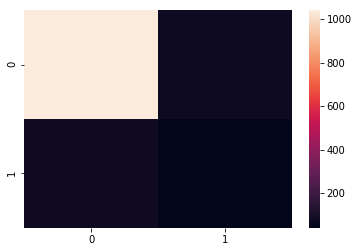

In [8]:
for i in clsfier.confusion_mtrx(y_predKN):
    print(i)

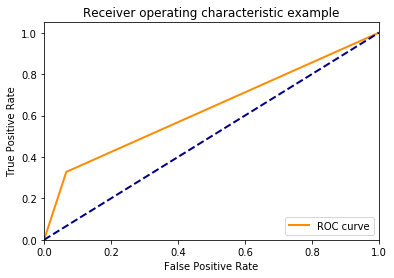

Area under curve:  0.6307207817052711


In [9]:
clsfier.AUC_ROC(y_predKN)

---
## Linear SVM

In [10]:
Lclf = SVC(kernel="linear", C=0.025)
y_predLSVM = clsfier.prediccion(Lclf)

### Desempeño del clasificador

In [11]:
for i in clsfier.desempeño(y_predLSVM):
    print(i, '\n')

Accuracy: 0.912621359223301 

Error: 0.08737864077669899 

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      1114
         yes       0.60      0.35      0.44       122

   micro avg       0.91      0.91      0.91      1236
   macro avg       0.76      0.66      0.70      1236
weighted avg       0.90      0.91      0.90      1236
 



### Matriz de confusion

[[1085   29]
 [  79   43]]
AxesSubplot(0.125,0.125;0.62x0.755)


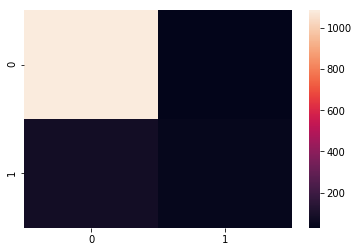

In [12]:
for i in clsfier.confusion_mtrx(y_predLSVM):
    print(i)

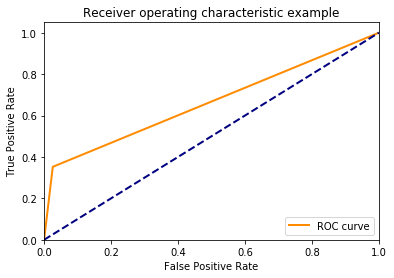

Area under curve:  0.6632133502074933


In [13]:
clsfier.AUC_ROC(y_predLSVM)

---
## RBF SVM

In [39]:
Gclf = SVC(gamma=2, C=1)
y_predLRBF = clsfier.prediccion(Gclf)

### Desempeño del clasificador

In [40]:
for i in clsfier.desempeño(y_predLRBF):
    print(i, '\n')

Accuracy: 0.901294498381877 

Error: 0.09870550161812297 

              precision    recall  f1-score   support

          no       0.90      1.00      0.95      1114
         yes       0.00      0.00      0.00       122

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.81      0.90      0.85      1236
 



/home/sebastian/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Matriz de confusion

[[1114    0]
 [ 122    0]]
AxesSubplot(0.125,0.125;0.62x0.755)


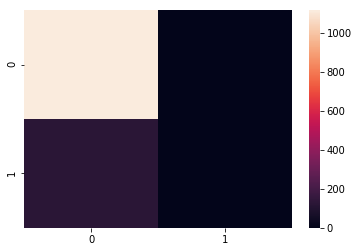

In [16]:
for i in clsfier.confusion_mtrx(y_predLRBF):
    print(i)

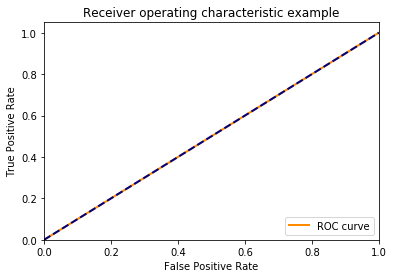

Area under curve:  0.5


In [17]:
clsfier.AUC_ROC(y_predLRBF)

---
## Decision Tree

In [18]:
clf_tree = tree.DecisionTreeClassifier(max_depth=5)
y_predTREE = clsfier.prediccion(clf_tree)

### Desempeño del clasificador

In [19]:
for i in clsfier.desempeño(y_predTREE):
    print(i, '\n')

Accuracy: 0.8988673139158576 

Error: 0.10113268608414239 

              precision    recall  f1-score   support

          no       0.93      0.96      0.94      1114
         yes       0.48      0.34      0.40       122

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.71      0.65      0.67      1236
weighted avg       0.89      0.90      0.89      1236
 



### Matriz de confusion

In [20]:
for i in clsfier.confusion_mtrx(y_predTREE):
    print(i)

[[1070   44]
 [  81   41]]
AxesSubplot(0.125,0.125;0.62x0.755)


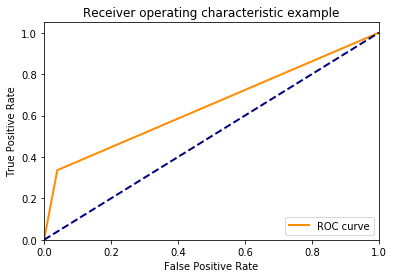

Area under curve:  0.6482841333843482


In [21]:
clsfier.AUC_ROC(y_predTREE)

---
##  Random Forest

In [22]:
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
y_predRF = clsfier.prediccion(rf)

### Desempeño del clasificador

In [23]:
for i in clsfier.desempeño(y_predRF):
    print(i, '\n')

Accuracy: 0.9053398058252428 

Error: 0.09466019417475724 

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      1114
         yes       0.65      0.09      0.16       122

   micro avg       0.91      0.91      0.91      1236
   macro avg       0.78      0.54      0.55      1236
weighted avg       0.88      0.91      0.87      1236
 



### Matriz de confusion

In [24]:
for i in clsfier.confusion_mtrx(y_predRF):
    print(i)

[[1108    6]
 [ 111   11]]
AxesSubplot(0.125,0.125;0.62x0.755)


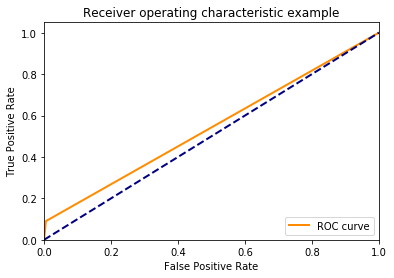

Area under curve:  0.5423889690084469


In [25]:
clsfier.AUC_ROC(y_predRF)

---
##  Neural Net

In [26]:
net = MLPClassifier(alpha=1)
y_predMLP = clsfier.prediccion(net)

### Desempeño del clasificador

In [27]:
for i in clsfier.desempeño(y_predMLP):
    print(i, '\n')

Accuracy: 0.8802588996763754 

Error: 0.11974110032362462 

              precision    recall  f1-score   support

          no       0.95      0.91      0.93      1114
         yes       0.42      0.59      0.49       122

   micro avg       0.88      0.88      0.88      1236
   macro avg       0.69      0.75      0.71      1236
weighted avg       0.90      0.88      0.89      1236
 



### Matriz de confusion

[[1016   98]
 [  50   72]]
AxesSubplot(0.125,0.125;0.62x0.755)


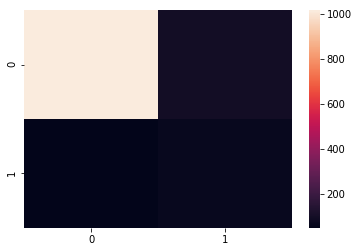

In [28]:
for i in clsfier.confusion_mtrx(y_predMLP):
    print(i)

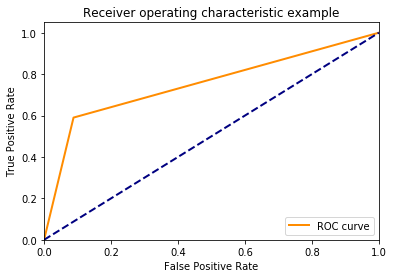

Area under curve:  0.7510963298702062


In [29]:
clsfier.AUC_ROC(y_predMLP)

---
## Linear Discriminant Analysis

In [30]:
lda = LinearDiscriminantAnalysis()
y_predLDA = clsfier.prediccion(lda)

### Desempeño del clasificador

In [31]:
for i in clsfier.desempeño(y_predLDA):
    print(i, '\n')

Accuracy: 0.8964401294498382 

Error: 0.1035598705501618 

              precision    recall  f1-score   support

          no       0.94      0.94      0.94      1114
         yes       0.47      0.46      0.47       122

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.71      0.70      0.70      1236
weighted avg       0.89      0.90      0.90      1236
 



### Matriz de confusion

[[1052   62]
 [  66   56]]
AxesSubplot(0.125,0.125;0.62x0.755)


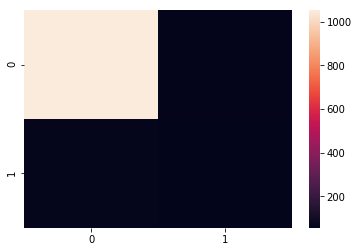

In [32]:
for i in clsfier.confusion_mtrx(y_predLDA):
    print(i)

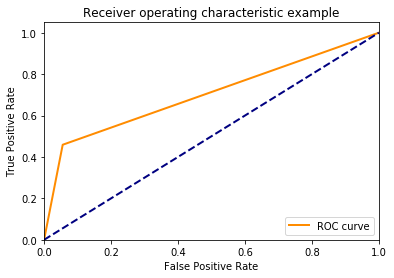

Area under curve:  0.7016805486064103


In [33]:
clsfier.AUC_ROC(y_predLDA)

---
## Quadratic Discriminant Analysis

In [34]:
QDA = QuadraticDiscriminantAnalysis()
y_predQDA = clsfier.prediccion(QDA)

### Desempeño del clasificador

In [35]:
for i in clsfier.desempeño(y_predQDA):
    print(i, '\n')

Accuracy: 0.872168284789644 

Error: 0.12783171521035597 

              precision    recall  f1-score   support

          no       0.94      0.92      0.93      1114
         yes       0.37      0.43      0.40       122

   micro avg       0.87      0.87      0.87      1236
   macro avg       0.66      0.68      0.66      1236
weighted avg       0.88      0.87      0.88      1236
 



### Matriz de confusion

[[1025   89]
 [  69   53]]
AxesSubplot(0.125,0.125;0.62x0.755)


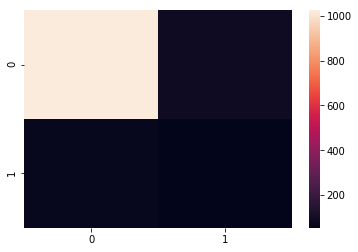

In [36]:
for i in clsfier.confusion_mtrx(y_predQDA):
    print(i)

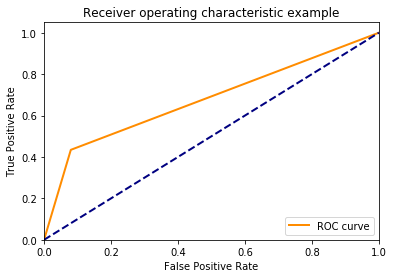

Area under curve:  0.6772669747181917


In [37]:
clsfier.AUC_ROC(y_predQDA)

# Conclusión

Se puede observar que los clasificadores que tuvieron un peor desempeño fueron Random forest y RBF SVM, ya que tienen curvas ROC mas ajustada a $y=x$. Algunas métricas son más interesantes que otras, para este caso particular (subscripción a servicio bancario), es más importante reducir el Error Tipo II, ya que en este caso la predicción diría que el sujeto no se va a subscribir, cuando en realidad si se iba a subscribir!!, pudiendo haber sido un potencial cliente para el banco. Si lo que se desea es **reducir la cantidad de falsos negativos**, entonces es recomendable tomar especial atención a la matriz de confusión en la esquina superior derecha. Lo anterior es posible medirlo con la métrica __sensitivity__, ya que se define por: $$ $$ $$ \frac{Verdaderos Positivos}{Verdaderos Positivos + Falsos Negativos} $$ $$ $$ Por lo tanto, mientras menos _Falsos Negativos_ existan, sensitivity será más cercano a 1. Todo lo anterior no quiere decir que el Accuracy de los clasificadores deje de ser importante, pero para evitar la famosa paradoja Accuracy paradox, se ha hecho énfasis en la sensibilidad.

Considerando todas las metricas solicitadas, y considerando la sensibilidad como una métrica importante, se obtuvo que los mejores 2 clasificadores son: 
+ 1 Neural Net
+ 2 LDA

Si bien ninguno de los 2 obtuvo el mejor Accuracy ambos (aunque sobre el 88%), tuvieron la mejor curva ROC, la mejor área bajo la curva AUC, el mejor F1-score y la mejor sensibilidad.

### Neural Net

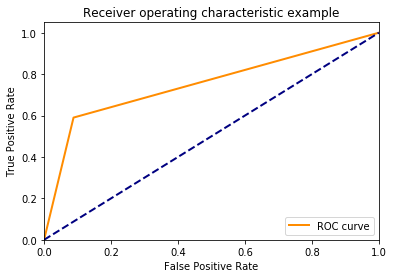

Area under curve:  0.7510963298702062


In [41]:
clsfier.AUC_ROC(y_predMLP)

---
### LDA

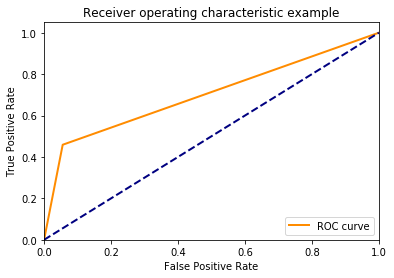

Area under curve:  0.7016805486064103


In [42]:
clsfier.AUC_ROC(y_predLDA)

# Referencias

[Accuracy Paradox](https://towardsdatascience.com/accuracy-paradox-897a69e2dd9b "Accuracy Paradox")

[Classification Performance Metrics](https://becominghuman.ai/understand-classification-performance-metrics-cad56f2da3aa "Classification Performance Metrics")

[Classification: ROC Curve and AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc "Classification: ROC Curve and AUC")

[Scikit-learn Classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning "scikit-learn")